# 実習5　K-means法

## 実習概要
scikit-learnライブラリを用いて、K-Means法を適用する方法を習得します。
- K-Means法の適用
- クラスタリング結果の可視化

## 事前準備
Jupyter Notebookが起動していない場合、「C:\PyAna」フォルダで、Jupyter Notebookを起動します。コマンドは以下です。
> cd C:\PyAna

> jupyter notebook

## 実習の流れ

### 1. 「exercise」フォルダに移動し、ノートブックを起動します（ノートブック名：「exercise5」）。

### 2. 以下のライブラリをインポートします。
- numPy
- pandas
- matplotlib.pyplot
- sklearn.cluster から KMeans

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### 3. 以下のファイルをデータフレームとして読み込みます。データフレーム名は任意です。
- ファイル名：「exercise5_sjis.csv」（文字コード：「Shift-JIS」）

In [2]:
df = pd.read_csv('exercise5_sjis.csv', encoding='shift-jis') #exercise5_sjis.csvファイルを読み込み(Shift-JIS形式)

### 4. データの列構造を確認するために、先頭行を抽出します。

In [3]:
df.head() #データの確認

,注文番号,店舗種別,地域,惣菜販売額,弁当販売額
0,N1,自然食,東京,1422,1989
1,N2,自然食,東京,1059,2267
2,N3,自然食,東京,1660,2000
3,N4,一般,東京,2145,592
4,N5,自然食,東京,3171,1438


### 5. 以下のクラスタ数で、注文（顧客）をグループ分けします。
- クラスタ数：4

In [4]:
kmeans = KMeans(n_clusters=4)                         #K-means法の呼び出し（クラスタ数は4を指定）

In [5]:
kmeans.fit(X=df.loc[:, ['惣菜販売額', '弁当販売額']])    #対象のデータに惣菜販売額と弁当販売額を指定して適用

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 6. 元のデータフレームに、クラスタ番号を追加します。

In [6]:
df['クラスタ番号']=kmeans.labels_                      #元のデータフレームに、「クラスタ番号」列を追加
df.head()                                           #データの確認

,注文番号,店舗種別,地域,惣菜販売額,弁当販売額,クラスタ番号
0,N1,自然食,東京,1422,1989,3
1,N2,自然食,東京,1059,2267,3
2,N3,自然食,東京,1660,2000,3
3,N4,一般,東京,2145,592,0
4,N5,自然食,東京,3171,1438,2


### 7. クラスタの特徴を確認します。

各クラスタに属する個体数

In [7]:
df['クラスタ番号'].value_counts()                     #各クラスタに所属する個体数を出力

0    235
3     92
2     70
1     25
Name: クラスタ番号, dtype: int64

各クラスタの重心

In [8]:
#kmeans.cluster_centers_
df.groupby('クラスタ番号')['惣菜販売額', '弁当販売額'].mean() #各クラスタの平均（重心）を出力

,惣菜販売額,弁当販売額
クラスタ番号,,
0,1246.638298,731.693617
1,2157.280000,6400.640000
2,3998.200000,1113.642857
3,809.869565,2976.271739


### 8. 惣菜販売額と弁当販売額を散布図で可視化し、各クラスタの特徴を把握します。

In [9]:
fig = plt.figure()                 #グラフ描画用オブジェクトを生成
ax = fig.add_subplot(1, 1, 1)      #グラフの描画位置を指定

In [10]:
#クラスタ番号別に、グラフの描写方法(パラメータの設定)と利用データを指定
df[df['クラスタ番号']==0].plot(x='惣菜販売額', y='弁当販売額', kind='scatter', ax=ax,color='r', alpha=0.5)
df[df['クラスタ番号']==1].plot(x='惣菜販売額', y='弁当販売額', kind='scatter', ax=ax,color='b', alpha=0.5)
df[df['クラスタ番号']==2].plot(x='惣菜販売額', y='弁当販売額', kind='scatter', ax=ax,color='g', alpha=0.5)
df[df['クラスタ番号']==3].plot(x='惣菜販売額', y='弁当販売額', kind='scatter', ax=ax,color='m', alpha=0.5)

In [11]:
plt.legend([0, 1, 2, 3]) #ラベルの指定

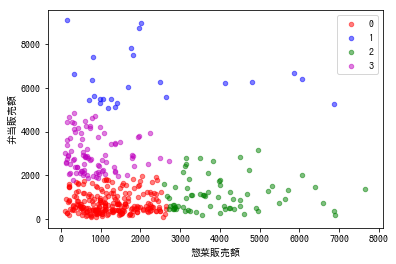

In [12]:
plt.show()               #グラフ描写

### 【チャレンジ】積み上げ棒グラフを作成し、店舗種別によって、顧客層（クラスタ）に違いがあるかを確認します。

In [13]:
#店舗種別、クラスタ番号別の注文番号数を集計
bar_data = df.pivot_table('注文番号', aggfunc='count', index='店舗種別', columns='クラスタ番号') 
bar_data.head()

クラスタ番号,0,1,2,3
店舗種別,,,,
一般,208,2,60,13
自然食,27,23,10,79


In [14]:
fig = plt.figure()                                   #グラフ描画用オブジェクトを生成
ax = fig.add_subplot(1, 1, 1)                        #グラフの描画位置を指定

In [15]:
bar_data.plot(kind='bar', ax=ax, stacked=True)       #グラフの描写方法(パラメータの設定)と利用データを指定

In [16]:
plt.legend(bbox_to_anchor=(1.3, 1))                  #詳細な描写設定（bbox_to_anchor:凡例の表示位置の指定）

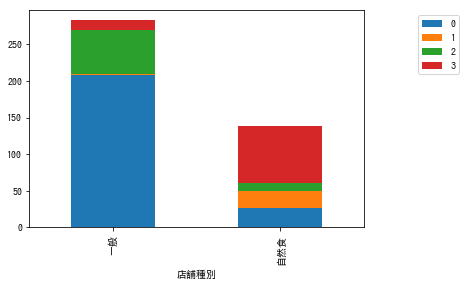

In [17]:
plt.show()                                           #グラフ描写